In [1]:
import numpy as np
import matplotlib.pyplot as plt
import halotools.mock_observables

tpcf = halotools.mock_observables.tpcf

/hpcfs/home/fl.gomez10/.conda/envs/pythesis/lib/python3.7/site-packages/halotools/sim_manager/halo_table_cache.py:12: UserWarning: Some of the functionality of the HaloTableCache classrequires h5py to be installed.
  warn("Some of the functionality of the HaloTableCache class"
/hpcfs/home/fl.gomez10/.conda/envs/pythesis/lib/python3.7/site-packages/halotools/sim_manager/halo_table_cache_log_entry.py:14: UserWarning: Most of the functionality of the sim_manager sub-package requires h5py to be installed,
which can be accomplished either with pip or conda. 
  warn("Most of the functionality of the "
/hpcfs/home/fl.gomez10/.conda/envs/pythesis/lib/python3.7/site-packages/halotools/sim_manager/user_supplied_ptcl_catalog.py:13: UserWarning: Most of the functionality of the sim_manager sub-package requires h5py to be installed,
which can be accomplished either with pip or conda
  warn("Most of the functionality of the sim_manager "
/hpcfs/home/fl.gomez10/.conda/envs/pythesis/lib/python3.7/site

In [2]:
RawVoidCats = []

nrand_steps = 5
beta_steps  = 5

beta  = np.linspace(1.2, 2.0, beta_steps)
nrand = np.linspace(1.0, 1.8, nrand_steps)

CounterZero = 60


for i in range(CounterZero,80):
    dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), 
                         delimiter=",",
                         dtype=[('ID', 'i8'),('x', 'f8'), ('y', 'f8'),('z', 'f8'),
                               ('N', 'i8'),('R', 'f8'),('a', 'f8'),('b', 'f8'), ('c', 'f8'), 
                               ('a_x', 'f8'), ('a_y', 'f8'), ('a_z', 'f8'),
                               ('b_x', 'f8'), ('b_y', 'f8'), ('b_z', 'f8'),
                               ('c_x', 'f8'), ('c_y', 'f8'), ('c_z', 'f8')])
    j = i % nrand_steps
    k = (i-CounterZero)//nrand_steps 
    
    RawVoidCats.append([i, beta[j], np.round(nrand[k], decimals=1), dataset])   
    
nrand_steps = 4

beta = 1.0
nrand = np.linspace(1.0, 1.6, nrand_steps)
CounterZero = 50

for i in range(CounterZero, 54):
    dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), 
                         delimiter=",", 
                         dtype=[('ID', 'i8'),('x', 'f8'), ('y', 'f8'),('z', 'f8'),
                               ('N', 'i8'),('R', 'f8'),('a', 'f8'),('b', 'f8'), ('c', 'f8'), 
                               ('a_x', 'f8'), ('a_y', 'f8'), ('a_z', 'f8'),
                               ('b_x', 'f8'), ('b_y', 'f8'), ('b_z', 'f8'),
                               ('c_x', 'f8'), ('c_y', 'f8'), ('c_z', 'f8')])
    k = (i - CounterZero) % nrand_steps
    RawVoidCats.append([i, beta, np.round(nrand[k], decimals=1), dataset])
    
nrand_steps = 4
nrand = 1.8
beta  = np.linspace(1.0, 1.6, nrand_steps)
beta  = np.round(beta, decimals=1)
CounterZero = 30

for i in range(30, 34):
    dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), 
                         delimiter=",", 
                         dtype=[('ID', 'i8'),('x', 'f8'), ('y', 'f8'),('z', 'f8'),
                               ('N', 'i8'),('R', 'f8'),('a', 'f8'),('b', 'f8'), ('c', 'f8'), 
                               ('a_x', 'f8'), ('a_y', 'f8'), ('a_z', 'f8'),
                               ('b_x', 'f8'), ('b_y', 'f8'), ('b_z', 'f8'),
                               ('c_x', 'f8'), ('c_y', 'f8'), ('c_z', 'f8')])
    k = (i - CounterZero) % nrand_steps
    RawVoidCats.append([i, beta[k], nrand, dataset])
    
i = 36 
dataset = np.loadtxt("volume_and_excentricity/{}.vae".format(i), 
                     delimiter=",", 
                     dtype=[('ID', 'i8'),('x', 'f8'), ('y', 'f8'),('z', 'f8'),
                               ('N', 'i8'),('R', 'f8'),('a', 'f8'),('b', 'f8'), ('c', 'f8'), 
                               ('a_x', 'f8'), ('a_y', 'f8'), ('a_z', 'f8'),
                               ('b_x', 'f8'), ('b_y', 'f8'), ('b_z', 'f8'),
                               ('c_x', 'f8'), ('c_y', 'f8'), ('c_z', 'f8')])
beta  = 1.0
nrand = 2.0
RawVoidCats.append([i, beta, nrand, dataset])


In [3]:

BoxLength = 720
Trim = 30
R_cut = 10

def TrimCatalog(ellip_cat):    
    halfboxtrim = BoxLength/2 - Trim

    index = np.where( 
            (abs(ellip_cat["x"]) < halfboxtrim) & 
            (abs(ellip_cat["y"]) < halfboxtrim) & 
            (abs(ellip_cat["z"]) < halfboxtrim) & 
             ( ellip_cat["R"]  > R_cut  ) )
    
    return ellip_cat[index]

def ellipticity(a,b,c):
    return (1/4.)*((a**2 - c**2) / (a**2 + b**2 + c**2))

def prolatness(a,b,c):
    return(1/4.)*( (b**2-c**2)+(b**2 - a**2)) / (a**2 + b**2 + c**2)


## To do the prolate/oblate scatter plot.
def density_estimation(m1, m2, xmin, xmax, ymin, ymax):
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = scipy.stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

Volume = (BoxLength - 2*Trim) ** 3
print(Volume)


VoidCats = []

for i in range(len(RawVoidCats)):
    j     = RawVoidCats[i][0]
    beta  = RawVoidCats[i][1]
    nrand = RawVoidCats[i][2]
    #print(j, beta, nrand, len(RawVoidCats[i][-1]))
    VoidCats.append([beta, nrand, TrimCatalog(RawVoidCats[i][3])])



nan_array = np.zeros((1,1))
    
VoidCats.append([1.2, 2.0, nan_array])
VoidCats.append([1.4, 2.0, nan_array])
VoidCats.append([1.6, 2.0, nan_array])
VoidCats.append([1.8, 1.8, nan_array])
VoidCats.append([1.8, 2.0, nan_array])
VoidCats.append([2.0, 1.8, nan_array])
VoidCats.append([2.0, 2.0, nan_array])

VoidCats.sort(key = lambda x: x[1])
VoidCats.sort(key = lambda x: x[0])

287496000


In [4]:

data = {}
data['150'] = np.loadtxt("./volume_and_excentricity/150.vae", delimiter=',',
                        dtype=[('ID', 'i8'),('x', 'f8'), ('y', 'f8'),('z', 'f8'),
                               ('N', 'i8'),('R', 'f8'),('a', 'f8'),('b', 'f8'), ('c', 'f8'), 
                               ('a_x', 'f8'), ('a_y', 'f8'), ('a_z', 'f8'),
                               ('b_x', 'f8'), ('b_y', 'f8'), ('b_z', 'f8'),
                               ('c_x', 'f8'), ('c_y', 'f8'), ('c_z', 'f8')])
data['300'] = np.loadtxt("./volume_and_excentricity/300.vae", delimiter=',',
                        dtype=[('ID', 'i8'),('x', 'f8'), ('y', 'f8'),('z', 'f8'),
                               ('N', 'i8'),('R', 'f8'),('a', 'f8'),('b', 'f8'), ('c', 'f8'), 
                               ('a_x', 'f8'), ('a_y', 'f8'), ('a_z', 'f8'),
                               ('b_x', 'f8'), ('b_y', 'f8'), ('b_z', 'f8'),
                               ('c_x', 'f8'), ('c_y', 'f8'), ('c_z', 'f8')])


pos_150 = np.array([data['150']['x'], data['150']['y'], data['150']['z']]).T

pos_300 = np.array([data['300']['x'], data['300']['y'], data['300']['z']]).T


In [5]:
def correlation_log_r(positions, 
                     rbins = 20, 
                     n_random = 100000, 
                     estimator="Landy-Szalay",
                     Lbox = 660):
    """
    estimator values:  ‘Natural’, ‘Davis-Peebles’, ‘Hewett’ , ‘Hamilton’, ‘Landy-Szalay’ Default is Natural.
    """
    
    r_rand =  n_random / positions.shape[0]
    print(r_rand)
    
    Npts = n_random
    
    
    rmin = 0.5 # Mpc/h
    rmax = 150 # Mpc/h

    r  = np.logspace(np.log10(rmin), np.log10(rmax), rbins)
    r_plot = (0.5*(r[1:]+r[:-1]))

    
    # Build the random catalog
    x = np.random.uniform(-Lbox/2., +Lbox/2., Npts)
    y = np.random.uniform(-Lbox/2., +Lbox/2., Npts)
    z = np.random.uniform(-Lbox/2., +Lbox/2., Npts)
    pos_rand = np.array([x,y,z]).T

    corr = tpcf(sample1=positions, rbins=r, randoms=pos_rand, estimator=estimator )

    fig = plt.figure()
    plt.axhline(y=0, c="k")
    plt.xlabel(r"r ($\mathrm{h^{-1}Mpc}$)", fontsize=15)
    plt.xscale("log")
    plt.ylabel(r"$\xi$", fontsize=15)
    plt.scatter(r_plot, corr)
    plt.tight_layout()
    plt.xlim(0.5,150)
    return r_plot, corr, r_rand

12.933264355923436


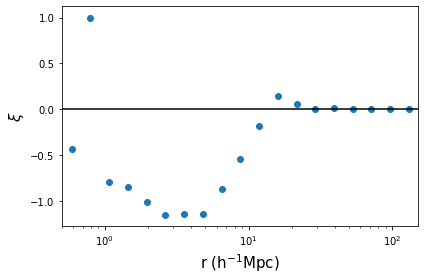

In [6]:
r, corr_log_300, ratio = correlation_log_r(pos_300,Lbox=720)

1.999120387029707


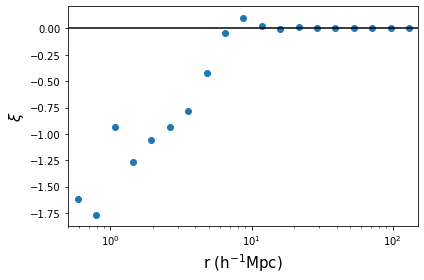

In [7]:
r, corr_log_150, _ = correlation_log_r(pos_150, Lbox=720)

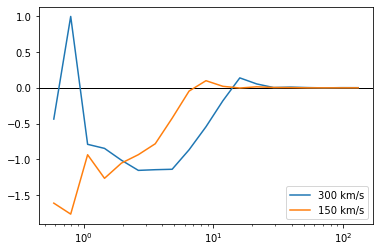

In [8]:

plt.axhline(y=0, c="k", lw=1)
plt.plot(r,corr_log_300, label="300 km/s")
plt.plot(r,corr_log_150, label="150 km/s")

plt.xscale("log")
plt.legend(loc=4)

In [9]:
RawVoidCats[20]

[50,
 1.0,
 1.0,
 array([(   0, -173.58188269,  133.20670292,  330.77602863, 16, 19.13758539, 26.56551445, 17.52484683, 15.05528436,  0.80874015,  0.17466609, -0.56163256,  0.43202386, -0.82437807,  0.36572691,  0.39911748,  0.53841671,  0.74216756),
        (   1,  196.26097085,  339.32444638,   21.62670858, 16, 16.31497063, 24.32986843, 13.85573571, 12.88218518, -0.42328959, -0.31886243,  0.8480287 ,  0.38517751,  0.78387982,  0.48700175, -0.82003915,  0.53278436, -0.20898953),
        (   2, -192.99487619,   79.80146451, -211.17895337, 32, 22.52004137, 39.23883735, 19.69076699, 14.78184991, -0.37894302,  0.84139826,  0.3852936 , -0.09312338, -0.44890146,  0.88871565,  0.92072267,  0.30089275,  0.24846193),
        ...,
        (8129,  280.6599498 , -184.71220667,  -67.58855959,  7,  8.99869616, 11.48335711, 10.80492959,  5.87283707,  0.57259668, -0.48076475, -0.66407703,  0.56510503,  0.8182907 , -0.10515054, -0.59396073,  0.31506442, -0.74023311),
        (8130, -284.75888998,  342

In [10]:

pos = np.array([VoidCats[0][2]["x"], VoidCats[0][2]["y"], VoidCats[0][2]["z"]]).T

In [11]:
pos.shape

(3865, 3)

25.873221216041397


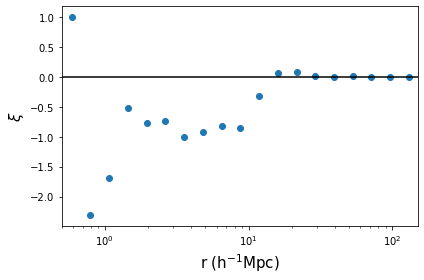

In [12]:
_, corr_log_pos, _ = correlation_log_r(pos)

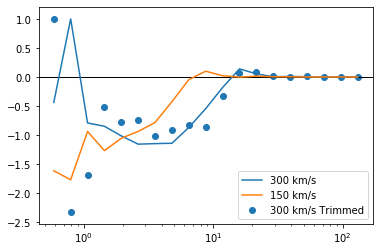

In [13]:

plt.axhline(y=0, c="k", lw=1)
plt.plot(r,corr_log_300, label="300 km/s")
plt.plot(r,corr_log_150, label="150 km/s")
plt.scatter(r,corr_log_pos, label="300 km/s Trimmed")

#plt.ylim(-0.5, 0.2)
plt.xscale("log")
plt.legend(loc=4)

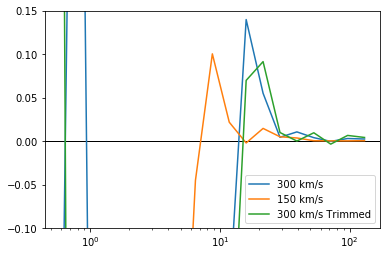

In [14]:
plt.axhline(y=0, c="k", lw=1)
plt.plot(r,corr_log_300, label="300 km/s")
plt.plot(r,corr_log_150, label="150 km/s")
plt.plot(r,corr_log_pos, label="300 km/s Trimmed")

plt.ylim(-0.1, 0.15)
plt.xscale("log")
plt.legend(loc=4)

In [15]:
!mkdir figures/correlation_functions

mkdir: cannot create directory ‘figures/correlation_functions’: File exists


# Testing with the Landy-Szalay Determinator

25.873221216041397


<Figure size 432x288 with 0 Axes>

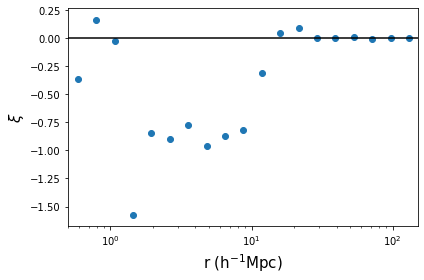

20.542317173377157


<Figure size 432x288 with 0 Axes>

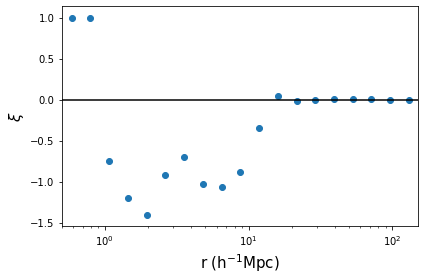

19.308746862328636


<Figure size 432x288 with 0 Axes>

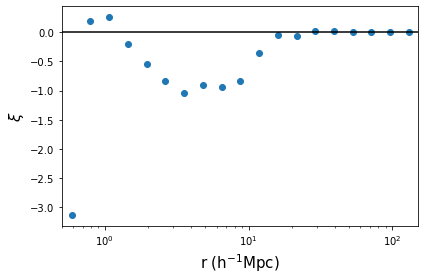

18.073377914332188


<Figure size 432x288 with 0 Axes>

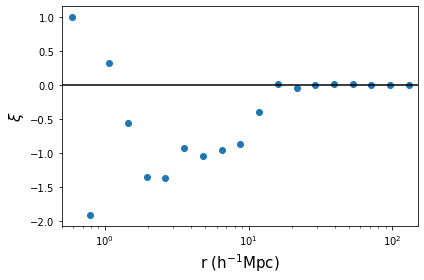

21.132713440405748


<Figure size 432x288 with 0 Axes>

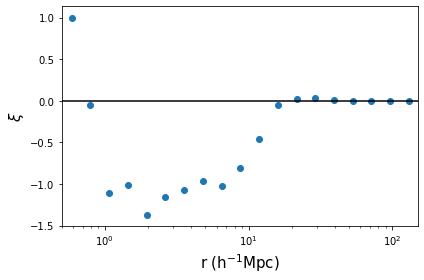

19.331142470520007


<Figure size 432x288 with 0 Axes>

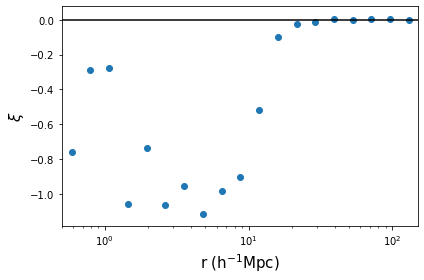

18.10610175629187


<Figure size 432x288 with 0 Axes>

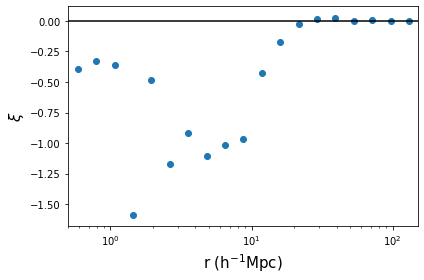

18.67762420620097


<Figure size 432x288 with 0 Axes>

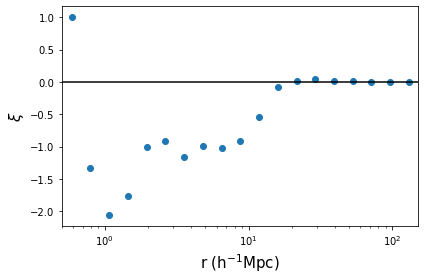

20.084354288009642


<Figure size 432x288 with 0 Axes>

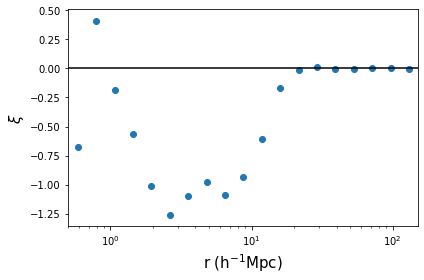

18.40264998159735


<Figure size 432x288 with 0 Axes>

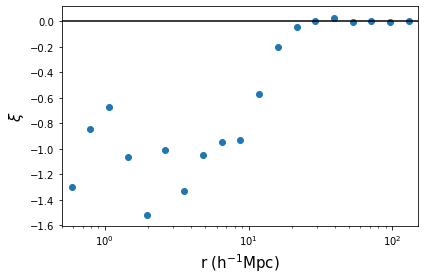

18.996960486322187


<Figure size 432x288 with 0 Axes>

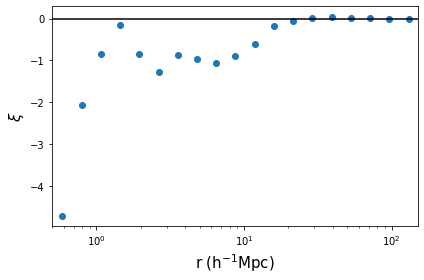

20.1450443190975


<Figure size 432x288 with 0 Axes>

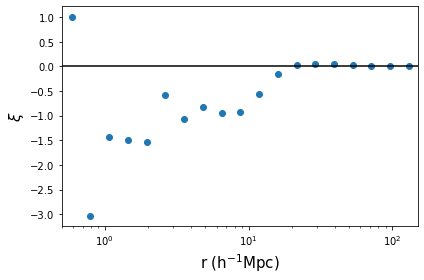

20.09646302250804


<Figure size 432x288 with 0 Axes>

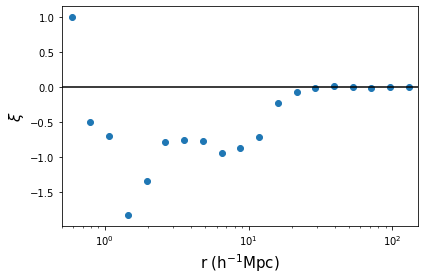

19.2789666473877


<Figure size 432x288 with 0 Axes>

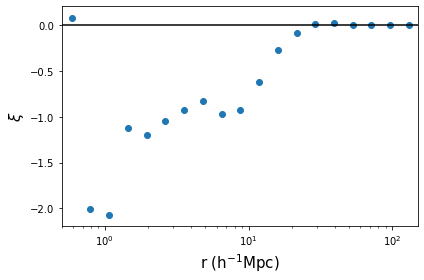

20.008003201280513


<Figure size 432x288 with 0 Axes>

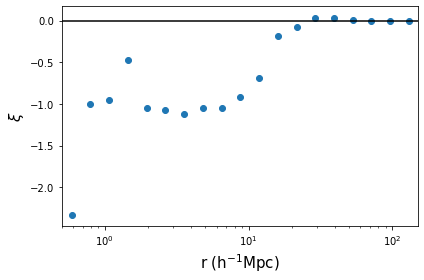

21.98768689533861


<Figure size 432x288 with 0 Axes>

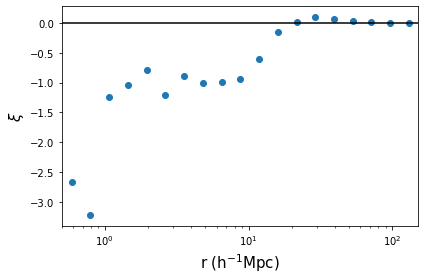

21.654395842356


<Figure size 432x288 with 0 Axes>

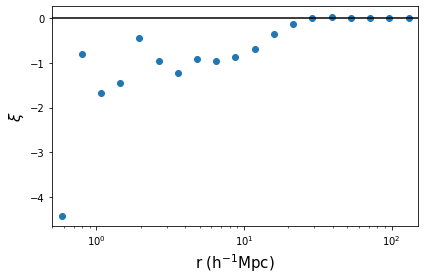

20.395676116663267


<Figure size 432x288 with 0 Axes>

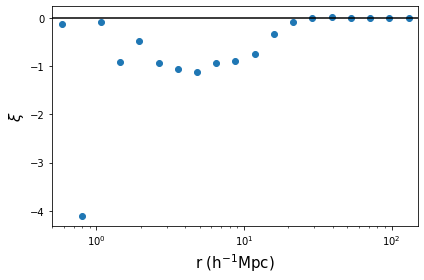

21.03934357248054


<Figure size 432x288 with 0 Axes>

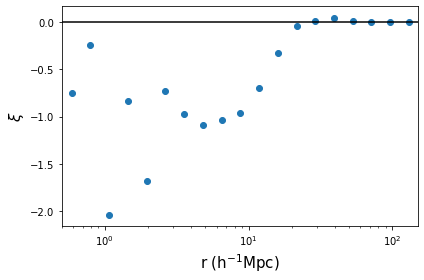

22.888532845044633


<Figure size 432x288 with 0 Axes>

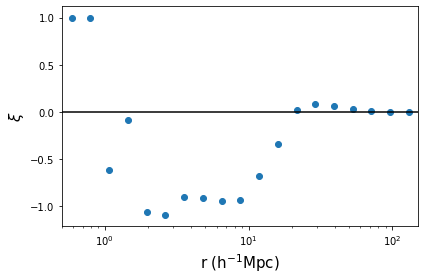

22.376370552696354


<Figure size 432x288 with 0 Axes>

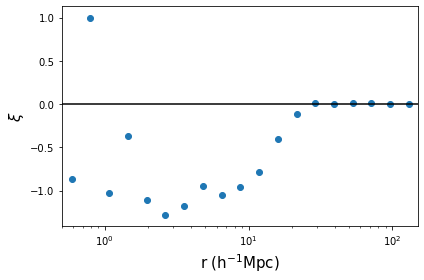

21.673168617251843


<Figure size 432x288 with 0 Axes>

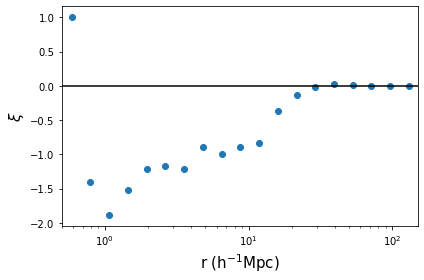

22.43661655822302


<Figure size 432x288 with 0 Axes>

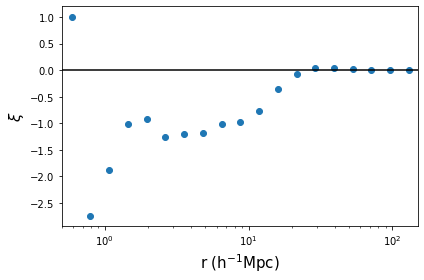

24.384296513045598


<Figure size 432x288 with 0 Axes>

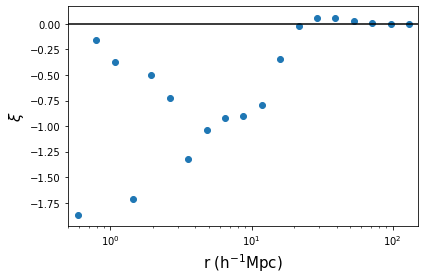

In [16]:
correlation_list = []
r = 0
ratio = []

for i in range(len(VoidCats)):
    cat = VoidCats[i]
    if cat[2].shape != (1,1):
        beta    = cat[0]
        nrand   = cat[1]
        
        if nrand <= 1.6:
            fig = plt.figure()
            voidcat = cat[2]
            pos = np.array([voidcat["x"], voidcat["y"], voidcat["z"]]).T        
            r , corr, aux = correlation_log_r(pos)
            ratio.append(aux)
            plt.show()
            plt.close()

            correlation_list.append([beta, nrand, corr])


In [17]:
n = 0
for i in range(len(correlation_list)):
    beta    = correlation_list[i][0]
    nrand   = correlation_list[i][1]
        
    print(i, beta, nrand)

0 1.0 1.0
1 1.0 1.2
2 1.0 1.4
3 1.0 1.6
4 1.2 1.0
5 1.2 1.2
6 1.2 1.4
7 1.2 1.6
8 1.4 1.0
9 1.4 1.2
10 1.4 1.4
11 1.4 1.6
12 1.6 1.0
13 1.6 1.2
14 1.6 1.4
15 1.6 1.6
16 1.8 1.0
17 1.8 1.2
18 1.8 1.4
19 1.8 1.6
20 2.0 1.0
21 2.0 1.2
22 2.0 1.4
23 2.0 1.6


In [18]:
correlation_list

[[1.0,
  1.0,
  array([-0.36174849,  0.16537996, -0.02131136, -1.57444987, -0.84421283,
         -0.89432809, -0.77353337, -0.96356075, -0.8750078 , -0.81966186,
         -0.31007249,  0.05275281,  0.09333124,  0.004527  ,  0.00381499,
          0.00850126, -0.00502683,  0.00511748,  0.0026033 ])],
 [1.0,
  1.2,
  array([ 1.00000000e+00,  1.00000000e+00, -7.48282313e-01, -1.20096255e+00,
         -1.40977182e+00, -9.20336683e-01, -7.02162081e-01, -1.03417252e+00,
         -1.06159748e+00, -8.84829965e-01, -3.45962617e-01,  3.78056938e-02,
         -1.21041316e-02,  5.19349854e-04,  3.09046567e-03,  6.60000467e-03,
          3.70960853e-03, -8.04688465e-04, -2.74836937e-03])],
 [1.0,
  1.4,
  array([-3.13758861e+00,  1.95468881e-01,  2.57355890e-01, -1.94355476e-01,
         -5.38545567e-01, -8.27576864e-01, -1.04681785e+00, -9.05101349e-01,
         -9.44095569e-01, -8.32640784e-01, -3.50894548e-01, -4.88594039e-02,
         -7.07452546e-02,  2.13859828e-02,  1.80695919e-02,  6.4204013

In [19]:
r

array([  0.58753189,   0.793243  ,   1.07097923,   1.44595858,
         1.95222853,   2.63575755,   3.55860891,   4.80457597,
         6.48679043,   8.75799454,  11.82440981,  15.96446158,
        21.55405958,  29.10072988,  39.28969746,  53.04610341,
        71.61900621,  96.69479418, 130.55030663])

0 1.0 1.0
1 1.0 1.2
2 1.0 1.4
3 1.0 1.6


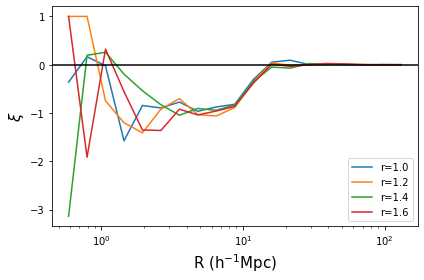

In [20]:
beta = 1.0
nrand = [1., 1.2, 1.4, 1.6]

for i in range(4):
    print(i, correlation_list[i][0], correlation_list[i][1])
    plt.plot(r, correlation_list[i][2], label="r={}".format(nrand[i]))
    #plt.fill_between(r_plot , correlation_list[i][0], correlation_list[i][2], alpha=0.2)
    
plt.axhline(y=0, c="k")
    
#plt.ylim(-0.3,0.1)
plt.xscale("log")

plt.xlabel(r"R ($\mathrm{h^{-1}Mpc}$)", fontsize=15)
plt.ylabel(r"$\xi$", fontsize=15)

plt.legend(loc=4)
plt.tight_layout()
plt.savefig("figures/correlation_functions/correlation_Landy-Szalay_b_1.0fixed.pdf")

20 2.0 1.0
21 2.0 1.2
22 2.0 1.4
23 2.0 1.6


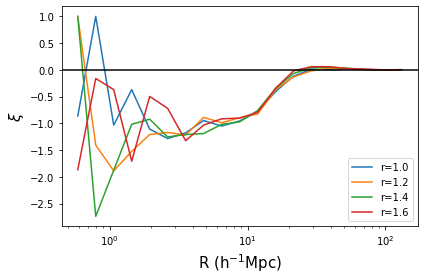

In [21]:
beta = 2.0
nrand = [1., 1.2, 1.4, 1.6]
index = range(20,24)

for i,n in zip(index, nrand):
    print(i, correlation_list[i][0], correlation_list[i][1])
    plt.plot(r, correlation_list[i][2], label="r={}".format(n))
    #plt.fill_between(r_plot , correlation_list[i][0], correlation_list[i][2], alpha=0.2)
    
plt.axhline(y=0, c="k")
    
#plt.ylim(-0.3,0.1)
plt.xscale("log")

plt.xlabel(r"R ($\mathrm{h^{-1}Mpc}$)", fontsize=15)
plt.ylabel(r"$\xi$", fontsize=15)

plt.legend(loc=4)
plt.tight_layout()
plt.savefig("figures/correlation_functions/correlation_Landy-Szalay_b_2.0fixed.pdf")

0 1.0 1.0
4 1.2 1.0
8 1.4 1.0
12 1.6 1.0
16 1.8 1.0
20 2.0 1.0


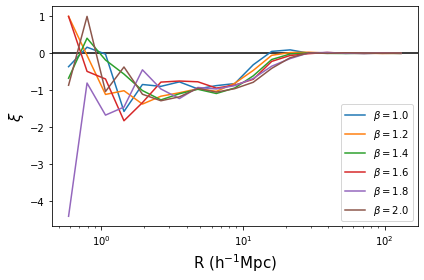

In [22]:
linestyles=["solid", "dotted", "dashed", "dashdot", (0, (1, 10)), (0, (5, 10)) ]

beta= [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
nrand = 1.0
index = range(0,23,4)


plt.axhline(y=0, c="k")
for i, b, ls in zip(index , beta, linestyles):
    print(i, correlation_list[i][0], correlation_list[i][1])
    plt.plot(r, correlation_list[i][2], ls = "solid", label=r"$\beta=$" +"{}".format(b) )
    
#plt.ylim(-0.5,0.1)
plt.xscale("log")

plt.xlabel(r"R ($\mathrm{h^{-1}Mpc}$)", fontsize=15)
plt.ylabel(r"$\xi$", fontsize=15)

plt.legend(loc=4)
plt.tight_layout()
plt.savefig("figures/correlation_functions/correlation_Landy-Szalay_r_1.0fixed.pdf")

3 1.0 1.6
7 1.2 1.6
11 1.4 1.6
15 1.6 1.6
19 1.8 1.6
23 2.0 1.6


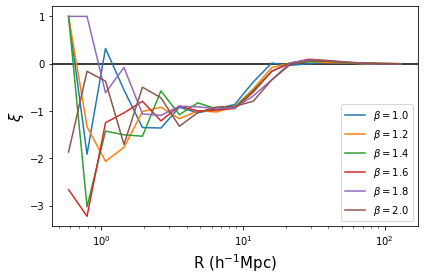

In [23]:
linestyles=["solid", "dotted", "dashed", "dashdot", (0, (1, 10)), (0, (5, 10)) ]

beta= [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
nrand = 1.6
index = range(3,24,4)

plt.axhline(y=0, c="k")
for i, b, ls in zip(index , beta, linestyles):
    print(i, correlation_list[i][0], correlation_list[i][1])
    plt.plot(r, correlation_list[i][2], ls = "solid", label=r"$\beta=$" +"{}".format(b) )
    
#plt.ylim(-0.5,0.1)
plt.xscale("log")

plt.xlabel(r"R ($\mathrm{h^{-1}Mpc}$)", fontsize=15)
plt.ylabel(r"$\xi$", fontsize=15)

plt.legend(loc=4)
plt.tight_layout()
plt.savefig("figures/correlation_functions/correlation_Landy-Szalay_r_1.6fixed.pdf")